In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import scipy.integrate as integrate

**Name:**

## Exercise 1: conditioning

Let $X\sim \mathcal{N}(0, \Sigma)$, where $\Sigma$ is given by
$$\Sigma = \begin{bmatrix}
10 & 1 & 11 & -4 \\
1 & 10 & 5 & 1 \\
11 & 5& 20 & -2 \\
-4 & 1 & -2 & 20
\end{bmatrix}.$$

**(i)** Determine the eigenvalues of $\Sigma$; is it a positive semidefinite matrix? Is it symmetric?

The definition of a positive semidefinite matrix is:
- $x^{T}Ax \geq 0$ for every $x \in \mathcal{R}^n$
- $A = B^{T}B$ for some $m \times n$ matrix $B$
- All the eignevalues of $A$ are non-negative.

Additionally, if there exists a cholesky decomposition of A, it can automatically deduced that $A$ is positive definite.

If $A$ is positive definite, there exists a lower triangular matrix $L$ such that $A = LL^{T}$

Proof:

If $A= LL^{T}$, then $x^{T}Ax = x^{T}LL^{T}x = ||L^{T}x||^2$

That is always positive for $x \neq 0$ if $L$ is invertible.

In [3]:
sigma = np.array([[10, 1, 11, -4],
                  [1, 10, 5, 1],
                  [11, 5, 20, -2],
                  [-4, 1, -2, 20]])

print(sigma==sigma.T)

eigenvalues, eigenvectors = np.linalg.eigh(sigma)

for i, val in enumerate(eigenvalues):
    print(f"\nEigenvalue {i+1}: {val:.4f}")
    print(f"Eigenvector {i+1}: {eigenvectors[:, i]}")

lowerTri = np.linalg.cholesky(sigma)

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]

Eigenvalue 1: 2.2152
Eigenvector 1: [ 0.79639536  0.23568552 -0.54710112  0.10434145]

Eigenvalue 2: 8.7197
Eigenvector 2: [-0.32641886  0.9111668  -0.12431892 -0.21856487]

Eigenvalue 3: 19.4647
Eigenvector 3: [-0.02557656 -0.27084564 -0.32654236 -0.90518427]

Eigenvalue 4: 29.6004
Eigenvector 4: [-0.50847911 -0.20216342 -0.76065449  0.34926163]


**(ii)** Let $X_I = (X_1, X_2)$ and $X_{II} = (X_3, X_4)$. Determine ${\rm I\!E}[X_I]$ and ${\rm I\!E}[X_{II}]$.

We can distribute the expectation operator to each element individually:

${\rm I\!E}[X_I] = ({\rm I\!E}[X_1], {\rm I\!E}[X_2])$

So each element is: $(\int X_1 f_{X_I}(x_1, x_2) dx_{1}dx_{2}, \int X_2 f_{X_I}(x_1, x_2) dx_{1}dx_{2})$





**(iii)** Determine ${\rm Var}(X_I)$ and ${\rm Var}(X_{II})$

${\rm Var}(X_I) = {\rm I\!E}[(X_I - {\rm I\!E}[X_I])^2]$

${\rm I\!E}[X_{I}X_{I}^{T} - X_{I}\mu^{T} - \mu{X_{I}^{T}} + \mu\mu^{T}]$

${\rm I\!E}[X_{I}X_{I}^{T}] - {\rm I\!E}[X_I]\mu^{T} - \mu{\rm I\!E}[X_{I}^{T}] + \mu\mu^{T}$

${\rm I\!E}[X_{I}X_{I}^{T}] - \mu\mu^{T} - \mu\mu^{T} + \mu\mu^{T}$

${\rm Var}(X_I) = {\rm I\!E}[X_{I}X_{I}^{T}] - \mu_{I}\mu_{I}^{T}$

${\rm Var}(X_{II}) = {\rm I\!E}[X_{II}X_{II}^{T}] - \mu_{II}\mu_{II}^{T}$

**(iv)** Determine ${\rm Cov}(X_I, X_{II})$

${\rm Cov}(X_I, X_{II}) = E[X_{I}​X_{II}^{⊤}​] − μ_{I}​μ_{II}^{⊤}$

**(v)** Determine the conditional expectation ${\rm I\!E}[X_I \mid X_{II}]$.

${\rm I\!E}[X_I \mid X_{II}] = \mu_I + \Sigma_{12}\Sigma_{22}^{-1}(X_{II} - \mu_{II})$

**(vi)** Use the conditional expectation you found in the question (v) to estimate $X_1$ and $X_2$ given that $X_3 = 12$ and $X_4 = -3.7$.

In [7]:
X3 = 12
X4 = -3.7
X_2 = np.array([X3, X4])
mu = np.array([0, 0])

expectation1Given2 = mu + sigma[0 : 2, 0 : 2] * np.invert(sigma[2 : 4, 2 : 4]) * (X_2)
print(expectation1Given2)

[[-2520.     -3.7]
 [   12.    777. ]]


**(vii)** In this question you are given the following function that allows you to plot the pdf of a 2D normal distribution given its mean and variance-covariance matrix. Take a moment to go through the code and understand how it works

In [9]:
# This is a useful function: it plots contours of the pdf of the 2D normal distribution
def plot_2d_normal_pdf(mu, cov, alpha=1):
    """
    Plots contours of 2D normal pdf

    :param mu: expected value
    :param cov: covariance matrix (2-by-2)
    :param alpha: transparency (alpha=1 is no transparency)
    """
    dx1 = 3.5 * np.sqrt(cov[0, 0])
    dx2 = 3.5 * np.sqrt(cov[1, 1])
    x, y = np.mgrid[mu[0]-dx1:mu[0]+dx1:.05, mu[1]-dx2:mu[1]+dx2:.05]
    pos = np.dstack((x, y))
    z = stats.multivariate_normal.pdf(pos, mu, cov)
    plt.contour(x, y, z, levels=10, alpha=alpha)

Here is an example where we plot the pdfs $\mathcal{N}(0, I)$ and $\mathcal{N}((1,1), \Sigma)$, with
$$\Sigma = \begin{bmatrix}1 & 1.1 \\ 1.1 & 2\end{bmatrix}.$$
We will plot $\mathcal{N}(0, I)$ with transparency $\alpha = 0.3$.

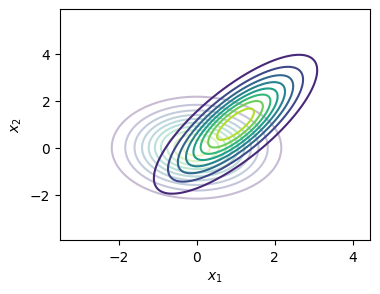

In [10]:
sgm = np.array([[1, 1.1], [1.1, 2]])
plt.figure(figsize=(4, 3))
plot_2d_normal_pdf([0, 0], np.eye(2), 0.3)
plot_2d_normal_pdf([1, 1], sgm)
plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
plt.show() # don't forget this!

Use `plot_2d_normal_pdf` to plot in the same figure the pdfs of $X_I$ and $X_{I} | X_{II} = (2.5, -3.7)$. Hint: they are both normally distributed.

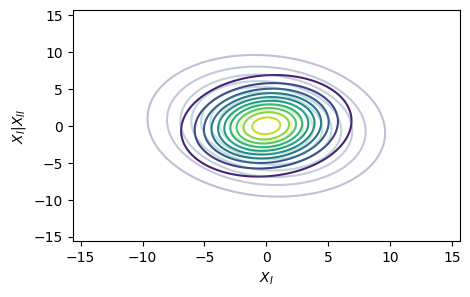

In [14]:
plt.figure(figsize=(5, 3))
plot_2d_normal_pdf(mu, sigma[0 : 2, 0 : 2])
plot_2d_normal_pdf(mu, sigma[2 : 4, 2 : 4], 0.3)
plt.xlabel('$X_I$'); plt.ylabel('$X_{I}|X_{II}$')
plt.show() # don't forget this!

## Exercise 2: LotUS

Let $X$ be an exponential random variable, i.e., its pdf is
$$p_X(x) = \lambda e^{-\lambda x},$$
for $x\geq 0$, and $p_X(x) = 0$ for $x<0$, and $\lambda > 0$ is a constant. In this exercise you will use the law of the unconscious statistician (LotUS) to determine the variance of $X$. Recall that the variance is given by
$${\rm Var}[X] = {\rm I\!E}[X^2] - {\rm I\!E}[X]^2,$$
so you need to determine ${\rm I\!E}[X^2]$ (using LotUS) and ${\rm I\!E}[X]$.

**(i)** Show that ${\rm I\!E}[X^2] = 2/\lambda^2$ and ${\rm I\!E}[X] = 1/\lambda$. Hint: use integration by parts.



> Write your answers here, so solve this on papaer.



**(ii)** Next, suppose $\lambda = 5$. Use `scipy.integrate.quad` as we did in the lecture to determine ${\rm I\!E}[X^2]$ and ${\rm I\!E}[X]$. Check your answers against the results you obtain using the formulas in (i), e.g., ${\rm I\!E}[X] = 1/\lambda = 1/5 = 0.2$.

In [27]:
# (ii) Your code goes here
l = 5
pdf = lambda x: l * np.exp(-l*x)
h = lambda x: x
integrand =  lambda x: h(x) * pdf(x)
expected = integrate.quad(integrand, 0, np.inf)
print(f"Expected value of X: {expected[0]:.2f}")

h2 = lambda x: x**2
integrand2 = lambda x: h2(x) * pdf(x)
expected2 = integrate.quad(integrand2, 0, np.inf)
print(f"Expected value of X: {expected2[0]:.2f}")

Expected value of X: 0.20
Expected value of X: 0.08
